# By: P.Akash

# The Sparks Foundation

## Data Science & Business Analytics Intern

## In this task ,we are going to find the student's percnetage based on their no.of study hours using linear regression

## Problem statement: what will be the student's predicted score if he/she studies for 9.25hours/day

In [2]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Create a dataframe using the csv file
student_data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(student_data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


# Basic anlaysis about  the dataframe

In [5]:
student_data.shape

(25, 2)

In [6]:
student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualize the data to check the correlation between the columns

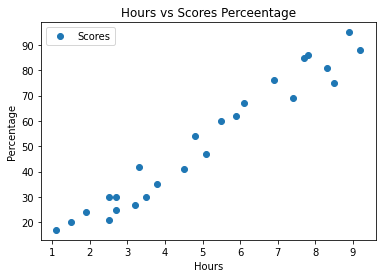

In [9]:
# visualize the data to find its corelation
student_data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores Perceentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

In [10]:
correlation = student_data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=student_data.drop(["Scores"],axis=1)

In [13]:
y=student_data["Scores"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear=LinearRegression()

In [17]:
linear.fit(x_train,y_train)

LinearRegression()

In [18]:
linear.intercept_

3.4015946183665946

In [19]:
linear.coef_

array([9.47388996])

# Find accuracy

In [20]:
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
test_predict=linear.predict(x_test)

In [22]:
test_predict

array([59.29754536, 27.08631951, 17.61242955, 76.35054728, 68.77143532])

In [23]:
r2_test=r2_score(y_test,test_predict)

In [24]:
r2_test

0.9527297377769763

In [25]:
train_predict=linear.predict(x_train)

In [26]:
r2_train=r2_score(y_train,train_predict)

In [27]:
r2_train

0.9510065287545815

# i use joblib package for deploy our model

In [28]:
import joblib

In [29]:
joblib.dump(linear,"student_data_model")

['student_data_model']

In [30]:
import numpy as np

In [31]:
np.array(student_data.iloc[0].to_list()).reshape(1,-1).shape

(1, 2)